In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import functions

In [5]:
24*365*3

26280

In [6]:
# take one example file 
# start = 50000
# end = 150000

start = 73000 # approximately September 1998                                                                                                                                                 │ │
end = start + 26280  # 4 years later 

path_daily = '/Volumes/T7 Shield/202409_paper2_modelruns/May2025_30years/SL_daily/1landcover_30percent/langtang_climate_cut/13b/'
path_once = '/Volumes/T7 Shield/202409_paper2_modelruns/May2025_30years/SL_once/1landcover_30percent/langtang_climate_cut/13b/'


df = pd.read_csv(path_daily + 'Sediment.out')[start:end]
df['D'] = pd.to_datetime(df['D'])
df = df.set_index('D')


df2 = pd.read_csv(path_once + 'Sediment.out')[start:end]
df2['D'] = pd.to_datetime(df2['D'])
df2 = df2.set_index('D')
df2
dfs_nonzero = df.dfs[df.dfs != 0]
dfs2_nonzero = df2.dfs[df2.dfs != 0]

hyd = pd.read_csv(path_daily + 'Hydro.out')[start:end]
hyd['D'] = pd.to_datetime(hyd['D'])
hyd = hyd.set_index('D')

# Calculate snow melt and accumulation separately
hyd['snowmelt'] = hyd['snowacc'].where(hyd['snowacc'] < 0, 0).abs()  # negative values, made positive
hyd['snow_accumulation'] = hyd['snowacc'].where(hyd['snowacc'] > 0, 0)  # positive values only

In [7]:
# imput for the model
# Precipitation, temperature

df.columns

'Q100', 'dfs', 'so', 'sopot','dfspot', 'conc', 'concpot', 'sc', 'ls', 'Qstl', 'Qdftl'

daily: (df)
so
sc
ls
dfs (placeholder) 

once(df2)
so
sc
ls
dfs (placeholder) 






NameError: name 'so' is not defined

In [ ]:
hyd.columns

'Q' 'snow', 'snowacc', 'PET', 'AET', 'Pr', 'Ta','glacier_melt'

In [ ]:
fig = plt.figure(figsize=(20, 15), layout='constrained')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            kkk
                            ddd
                            eee
                            jjj
                            ''')







mosaic['a'].plot(df.Q100, label = 'Q100')
mosaic['b'].plot(df.so, label = 'so')
mosaic['c'].plot(df.sc, label = 'sc')
mosaic['k'].plot(df2.sc, label = 'sc - once')
mosaic['d'].plot(df.dfs, label = 'dfs')
mosaic['e'].plot(df.Qstl, label = 'Qstl')

mosaic['j'].plot(hyd.Q, label = 'Q')


mosaic['a'].legend()
mosaic['b'].legend()
mosaic['c'].legend()
mosaic['d'].legend()
mosaic['e'].legend()
mosaic['j'].legend()

# Add light grey background for mid-May to end of September for each year                                                                                                                   
for ax in mosaic.values():
    for year in range(1998, 2002):  # Adjust years as needed                                                                                                          
        start_monsoon = pd.Timestamp(f'{year}-05-15')
        end_monsoon = pd.Timestamp(f'{year}-09-30')
        ax.axvspan(start_monsoon, end_monsoon, alpha=0.2, color='grey', zorder=0)


for ax in mosaic.values():
      ax.set_xlim(df.index.min(), df.index.max())




# Set same y-axis limits for both sc panels
max_sc = max(df.sc.max(), df2.sc.max())
mosaic['c'].set_ylim(0, max_sc * 1.1)
mosaic['k'].set_ylim(0, max_sc * 1.1)


In [ ]:
# fig = plt.figure(figsize=(20, 20), layout='constrained')
# mosaic = fig.subplot_mosaic('''
#                             aaa
#                             bbb
#                             ccc
#                             kkk
#                             ddd
#                             eee
#                             fff
#                             ggg
#                             hhh
#                             iii
#                             lll
#                             mmm
#                             nnn
#                             jjj
#                             ''')

# # Original sediment plots
# mosaic['a'].plot(df.Q100, label = 'Q100')
# mosaic['b'].plot(df.so, label = 'so')
# mosaic['c'].plot(df.sc, label = 'sc')
# mosaic['k'].plot(df2.sc, label = 'sc - once')
# mosaic['d'].plot(df.dfs, label = 'dfs')
# mosaic['e'].plot(df.Qstl, label = 'Qstl')

# # Hydro variables
# mosaic['j'].plot(hyd.Q, label = 'Q')
# mosaic['f'].plot(hyd.snow, label = 'snow')
# mosaic['g'].plot(hyd.snowacc, label = 'snowacc')
# mosaic['h'].plot(hyd.PET, label = 'PET')
# mosaic['i'].plot(hyd.AET, label = 'AET')
# mosaic['l'].plot(hyd.Pr, label = 'Pr')
# mosaic['m'].plot(hyd.Ta, label = 'Ta')
# mosaic['n'].plot(hyd.glacier_melt, label = 'glacier_melt')

# # Add legends
# for ax in mosaic.values():
#     ax.legend()

In [ ]:
# fig = plt.figure(figsize=(20, 20), layout='constrained')
# mosaic = fig.subplot_mosaic('''
#                             xxx
#                             aaa
#                             bbb
#                             ccc
#                             kkk
#                             ddd
#                             eee
#                             fff
#                             ggg
#                             hhh
#                             iii
#                             lll
#                             mmm
#                             nnn
#                             jjj
#                             ''')

# # ---- INPUT TO THE MODEL -----

# # Top panel with Ta and Pr (precipitation hanging from above)
# ax_temp = mosaic['x']
# ax_precip = ax_temp.twinx()

# # Plot temperature on left y-axis
# temp_line = ax_temp.plot(hyd.Ta, color='red', label='Temperature (Ta)')
# ax_temp.set_ylabel('Temperature (°C)', color='red')
# ax_temp.tick_params(axis='y', labelcolor='red')
# # Plot precipitation on right y-axis, inverted (hanging from above)
# precip_line = ax_precip.plot(hyd.Pr, color='blue', label='Precipitation (Pr)', alpha = 0.5)
# ax_precip.set_ylabel('Precipitation (mm)', color='blue')
# ax_precip.tick_params(axis='y', labelcolor='blue')
# # ax_precip.invert_yaxis()  # Makes precipitation hang from abov
# # Add combined legend
# lines = temp_line + precip_line
# labels = [l.get_label() for l in lines]
# ax_temp.legend(lines, labels, loc='upper left')


# # ------- HYDRO OUTPUT 
# # Rest of plots in blue
# mosaic['a'].plot(hyd.Q, color='blue', label='Q')

# mosaic['b'].plot(hyd.snow, color='blue', label='snow depth')
# mosaic['c'].plot(hyd.snow_accumulation, color='blue', label='snow accumulation')  # assuming this is snow depth
# mosaic['k'].plot(hyd.snowmelt, color='blue', label='snow melt')
# mosaic['e'].plot(hyd.glacier_melt, color='blue', label='glacier melt')

# mosaic['d'].plot(hyd.AET, color='blue', label='AET')



# # ------- SEDIMENT OUTPUT 
# sc 
# Q


In [ ]:
fig = plt.figure(figsize=(20, 25), layout='constrained')  # Increased height for more panels
mosaic = fig.subplot_mosaic('''
                            xxx
                            bbb
                            aaa
                            ccc
                            ddd
                            eee
                            fff
                            ggg
                            hhh
                            iii
                            lll
                            mmm
                            nnn
                            ooo
                            ''')



# ---- INPUT TO THE MODEL -----
# Top panel with Ta and Pr (precipitation hanging from above)
ax_temp = mosaic['x']
ax_precip = ax_temp.twinx()

# Plot temperature on left y-axis
temp_line = ax_temp.plot(hyd.Ta, color='red')#, label='Temperature (Ta)')
ax_temp.set_ylabel('Temperature (°C)', color='red')
ax_temp.tick_params(axis='y', labelcolor='red')

# Plot precipitation on right y-axis
precip_line = ax_precip.plot(hyd.Pr, color='darkblue', label='Precipitation (Pr)', alpha=0.5)
ax_precip.set_ylabel('Precipitation (mm)', color='blue')
ax_precip.tick_params(axis='y', labelcolor='blue')

# Add combined legend
lines = temp_line + precip_line
labels = [l.get_label() for l in lines]
ax_temp.legend(lines, labels, loc='upper left')

# ------- HYDRO OUTPUT 
mosaic['a'].plot(hyd.Q, color='darkblue', label='Q')
mosaic['b'].plot(hyd.snow, color='lightblue', label='snow depth')


# Plot as positive/negative with colors
mosaic['c'].plot(hyd.snow_accumulation, color='lightblue', label='snow accumulation', alpha=0.9)
mosaic['c'].plot(-hyd.snowmelt, color='darkblue', label='snow melt')  # Negative values
mosaic['c'].axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
mosaic['c'].set_ylabel('Snow accumulation/melt (mm)')
mosaic['c'].legend()

mosaic['c'].plot(hyd.glacier_melt, color='purple', label='glacier melt', alpha = 0.5)
mosaic['d'].plot(hyd.AET, color='blue', label='AET')



# ------- SEDIMENT OUTPUT 
# Daily sediment output (df)
mosaic['f'].plot(df.so, color='brown', label='so - daily')
mosaic['g'].plot(df.sc, color='brown', label='sc - daily')
# mosaic['h'].plot(df.ls, color='brown', label='ls - daily')
mosaic['g'].scatter(dfs_nonzero.index, dfs_nonzero.values, color='purple', label='dfs - daily',marker='D', s=50)

# Once sediment output (df2)
mosaic['l'].plot(df2.so, color='brown', linestyle='--', label='so - once')
mosaic['m'].plot(df2.sc, color='brown', linestyle='--', label='sc - once')
# mosaic['n'].plot(df2.ls, color='brown', linestyle='--', label='ls - once')
mosaic['o'].plot(df2.dfs, color='brown', linestyle='--', label='dfs - once')

# Add legends for all panels
for ax in mosaic.values():
    if ax != ax_precip:  # Skip the precipitation twin axis
        ax.legend()

# Add monsoon background and set x-limits
for ax in mosaic.values():
    if ax != ax_precip:  # Skip the precipitation twin axis
        for year in range(1998, 2002):
            start_monsoon = pd.Timestamp(f'{year}-05-15')
            end_monsoon = pd.Timestamp(f'{year}-09-30')
            ax.axvspan(start_monsoon, end_monsoon, alpha=0.2, color='grey', zorder=0)
        ax.set_xlim(df.index.min(), df.index.max())




In [ ]:
fig = plt.figure(figsize=(20, 25), layout='constrained')  # Increased height for more panels
mosaic = fig.subplot_mosaic('''
                            xxx
                            aaa
                            bbb
                            ccc
                            ddd
                            fff
                            ggg
                            ''')


# ---- INPUT TO THE MODEL -----
# Top panel with Ta and Pr (precipitation hanging from above)
ax_temp = mosaic['x']
ax_precip = ax_temp.twinx()

# Plot temperature on left y-axis
temp_line = ax_temp.plot(hyd.Ta, color='red')#, label='Temperature (Ta)')
ax_temp.set_ylabel('Temperature (°C)', color='red')
ax_temp.tick_params(axis='y', labelcolor='red')

# Plot precipitation on right y-axis
precip_line = ax_precip.plot(hyd.Pr, color='darkblue', label='Precipitation (Pr)', alpha=0.5)
ax_precip.set_ylabel('Precipitation (mm)', color='blue')
ax_precip.tick_params(axis='y', labelcolor='blue')

# Add combined legend
lines = temp_line + precip_line
labels = [l.get_label() for l in lines]
ax_temp.legend(lines, labels, loc='upper left')

# ------- HYDRO OUTPUT 
mosaic['d'].plot(hyd.Q, color='darkblue', label='Q')
mosaic['a'].plot(hyd.snow, color='darkblue', label='snow depth')


# Plot as positive/negative with colors
mosaic['c'].plot(hyd.AET, color='lightblue', label='AET', alpha = 0.2)
mosaic['b'].plot(hyd.snowmelt, color='darkblue', label='snow melt', alpha = 0.5)  # Negative values
# mosaic['c'].plot(hyd.snow_accumulation, color='pink', label='snow accumulation', alpha=0.9)

mosaic['a'].set_ylabel('Snow accumulation/melt (mm)')
mosaic['c'].legend()

mosaic['b'].plot(hyd.glacier_melt, color='blue', label='glacier melt', alpha = 0.5)


# ------- SEDIMENT OUTPUT 
# Daily sediment output (df)
mosaic['f'].plot(df.so, color='black', label='so - daily')
mosaic['g'].plot(df.sc, color='brown', label='sc - daily')
# mosaic['h'].plot(df.ls, color='brown', label='ls - daily')
mosaic['g'].scatter(dfs_nonzero.index, dfs_nonzero.values, color='none', edgecolor = 'brown',label='dfs - daily',marker='D', s=50)

# Once sediment output (df2)
mosaic['f'].plot(df2.so, color='brown', linestyle='--', label='so - once')
mosaic['g'].plot(df2.sc, color='black', linestyle='--', label='sc - once')
# mosaic['n'].plot(df2.ls, color='brown', linestyle='--', label='ls - once')
# mosaic['o'].plot(df2.dfs, color='brown', linestyle='--', label='dfs - once')
mosaic['g'].scatter(dfs2_nonzero.index, dfs2_nonzero.values, color='none', edgecolor = 'black',label='dfs - daily',marker='o', s=50)

# Add legends for all panels
for ax in mosaic.values():
    if ax != ax_precip:  # Skip the precipitation twin axis
        ax.legend()

# Add monsoon background and set x-limits
for ax in mosaic.values():
    if ax != ax_precip:  # Skip the precipitation twin axis
        for year in range(1998, 2002):
            start_monsoon = pd.Timestamp(f'{year}-05-15')
            end_monsoon = pd.Timestamp(f'{year}-09-30')
            ax.axvspan(start_monsoon, end_monsoon, alpha=0.2, color='grey', zorder=0)
        ax.set_xlim(df.index.min(), df.index.max())


sediment_panels = ['f']
for panel in sediment_panels:
    for spine in mosaic[panel].spines.values():
        spine.set_color('brown')
        spine.set_linewidth(2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


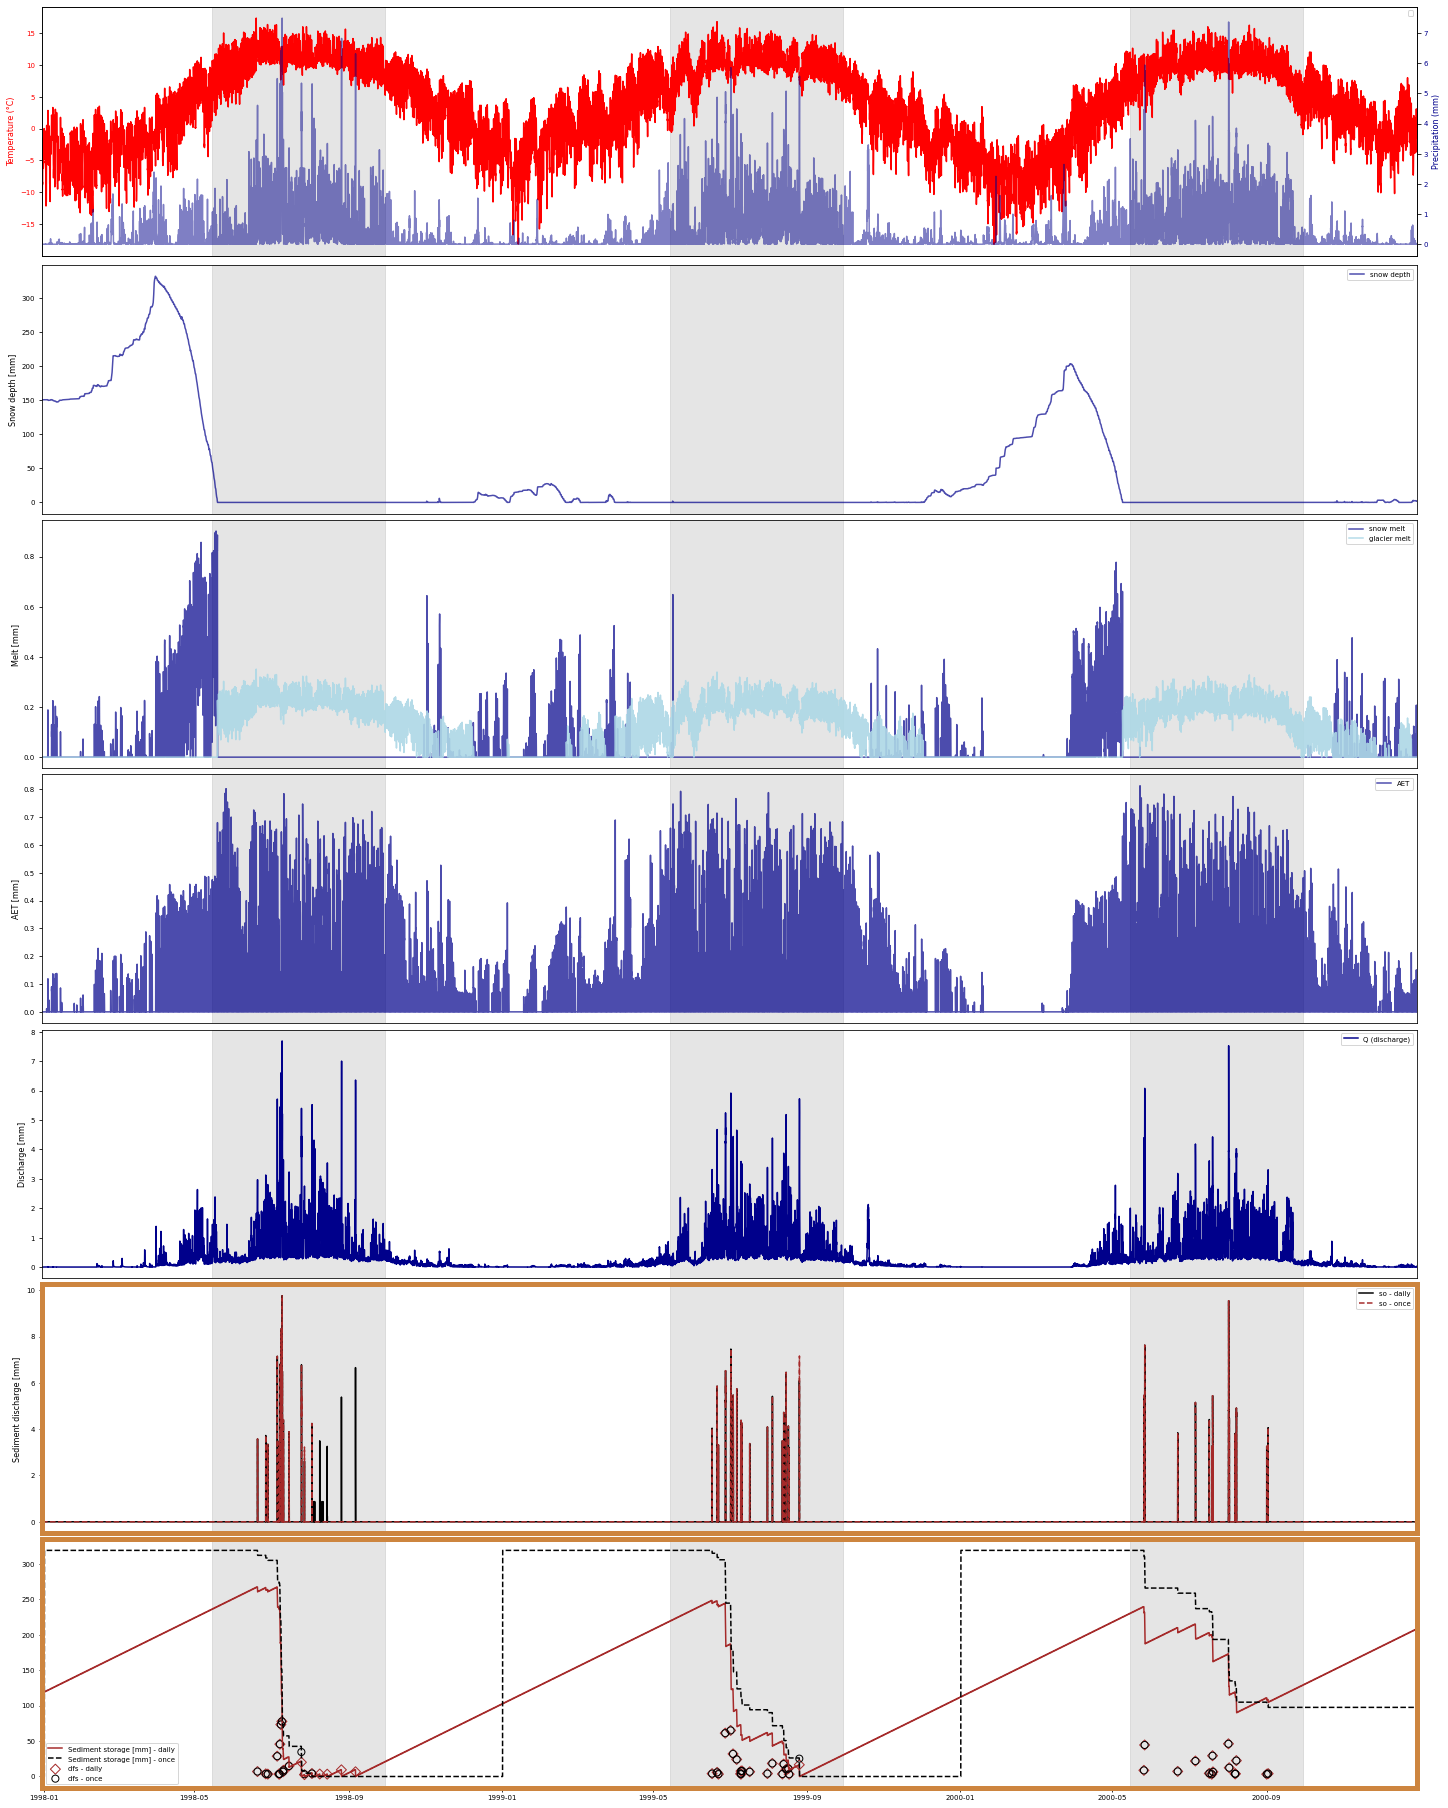

In [8]:
fig = plt.figure(figsize=(20, 25), layout='constrained')
mosaic = fig.subplot_mosaic('''
                            xxx
                            aaa
                            bbb
                            ccc
                            ddd
                            fff
                            ggg
                            ''')

# ============ MODEL INPUT ============
# Panel x - Temperature and Precipitation
ax_temp = mosaic['x']
ax_precip = ax_temp.twinx()

temp_line = ax_temp.plot(hyd.Ta, color='red')#, label='Temperature (Ta)')
ax_temp.set_ylabel('Temperature (°C)', color='red')
ax_temp.tick_params(axis='y', labelcolor='red')

precip_line = ax_precip.plot(hyd.Pr, color='darkblue', label='Precipitation (Pr)', alpha=0.5)
ax_precip.set_ylabel('Precipitation (mm)', color='darkblue')
ax_precip.tick_params(axis='y', labelcolor='darkblue')

# lines = temp_line + precip_line
# labels = [l.get_label() for l in lines]
# ax_temp.legend(lines, labels, loc='upper left')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='red', label='Temperature (Ta)'),
                   Line2D([0], [0], color='darkblue', alpha=0.5, label='Precipitation (Pr)')]
ax_temp.legend(handles=legend_elements, loc='upper left')


# ============ HYDRO OUTPUT ============
# Panel a - Snow depth
mosaic['a'].plot(hyd.snow, color='darkblue', label='snow depth', alpha = 0.7)
mosaic['a'].set_ylabel('Snow depth [mm]')

# Panel b - Snow melt and glacier melt
mosaic['b'].plot(hyd.snowmelt, color='darkblue', label='snow melt', alpha=0.7)
mosaic['b'].plot(hyd.glacier_melt, color='lightblue', label='glacier melt', alpha=0.9)
mosaic['b'].set_ylabel('Melt [mm]')

# Panel c - AET
mosaic['c'].plot(hyd.AET, color='darkblue', label='AET', alpha=0.7)
mosaic['c'].set_ylabel('AET [mm]')

# Panel d - Discharge
mosaic['d'].plot(hyd.Q, color='darkblue', label='Q (discharge)')
mosaic['d'].set_ylabel('Discharge [mm]')



# ============ SEDIMENT OUTPUT ============
# Panel f - Sediment organic (so)
mosaic['f'].plot(df.so, color='black', label='so - daily')
mosaic['f'].plot(df2.so, color='brown', linestyle='--', label='so - once')
mosaic['f'].set_ylabel('Sediment discharge [mm]')

# Panel g - Sediment concentration (sc) and debris flows (dfs)
mosaic['g'].plot(df.sc, color='brown', label='Sediment storage [mm] - daily')
mosaic['g'].plot(df2.sc, color='black', linestyle='--', label='Sediment storage [mm] - once')
mosaic['g'].scatter(dfs_nonzero.index, dfs_nonzero.values, color='none', edgecolor='brown', label='dfs - daily', marker='D', s=50)
mosaic['g'].scatter(dfs2_nonzero.index, dfs2_nonzero.values, color='none', edgecolor='black', label='dfs - once', marker='o', s=50)
# mosaic['g'].set_ylabel('Sediment concentration & debris flows')

# Add legends for all panels
for ax in mosaic.values():
    if ax != ax_precip:
        ax.legend()
        
# Add monsoon background and set x-limits
for ax in mosaic.values():
    if ax != ax_precip:
        for year in range(1998, 2002):
            start_monsoon = pd.Timestamp(f'{year}-05-15')
            end_monsoon = pd.Timestamp(f'{year}-09-30')
            ax.axvspan(start_monsoon, end_monsoon, alpha=0.2, color='grey', zorder=0)
        ax.set_xlim(df.index.min(), df.index.max())

# Add colored borders for sediment panels
sediment_panels = ['f', 'g']
for panel in sediment_panels:
    for spine in mosaic[panel].spines.values():
        spine.set_color('peru')
        spine.set_linewidth(5)




# Remove x-axis labels from all panels except the bottom one
for key, ax in mosaic.items():
    if key != 'g' and ax != ax_precip:  # 'g' is your bottom panel
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Ensure the bottom panel has x-axis labels
mosaic['g'].tick_params(axis='x', which='both', bottom=True, labelbottom=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_14963/1488988105.py:119: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


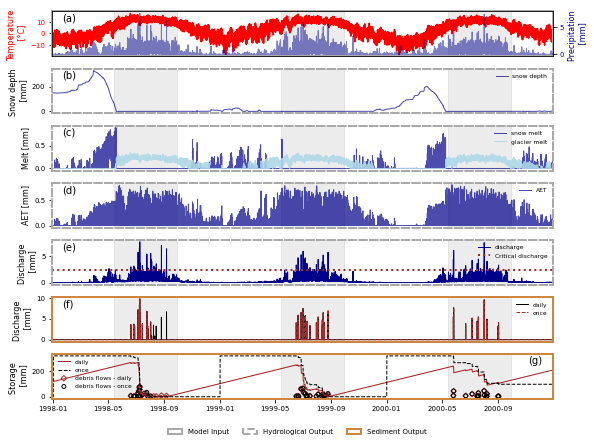

In [16]:
# Set font sizes for half A4 page
plt.rcParams.update({
    'font.size': 8,           # Base font size
    'axes.titlesize': 10,     # Title font size
    'axes.labelsize': 8,      # Axis label font size
    'xtick.labelsize': 7,     # X-axis tick label size
    'ytick.labelsize': 7,     # Y-axis tick label size
    'legend.fontsize': 7,     # Legend font size
    'figure.titlesize': 12    # Figure title size
})

fig = plt.figure(figsize=(8.3, 5.8), layout='constrained')  # Half A4 landscape

fig.patch.set_facecolor('xkcd:white')
mosaic = fig.subplot_mosaic('''
                            xxx
                            aaa
                            bbb
                            ccc
                            ddd
                            fff
                            ggg
                            ''')




# ============ MODEL INPUT ============
ax_temp = mosaic['x']
ax_precip = ax_temp.twinx()

temp_line = ax_temp.plot(hyd.Ta, color='red')#, label='Temperature', linewidth=1)
ax_temp.set_ylabel('Temperature \n [°C]', color='red', fontsize=8)
ax_temp.tick_params(axis='y', labelcolor='red', labelsize=7)

precip_line = ax_precip.plot(hyd.Pr, color='darkblue', label='Precipitation', alpha=0.5, linewidth=1)
ax_precip.set_ylabel('Precipitation \n [mm]', color='darkblue', fontsize=8)
ax_precip.tick_params(axis='y', labelcolor='darkblue', labelsize=7)

# ============ HYDRO OUTPUT ============
mosaic['a'].plot(hyd.snow, color='darkblue', label='snow depth', alpha=0.7, linewidth=1)
mosaic['a'].set_ylabel('Snow depth \n [mm]', fontsize=8)

mosaic['b'].plot(hyd.snowmelt, color='darkblue', label='snow melt', alpha=0.7, linewidth=1)
mosaic['b'].plot(hyd.glacier_melt, color='lightblue', label='glacier melt', alpha=0.9, linewidth=1)
mosaic['b'].set_ylabel('Melt [mm]', fontsize=8)

mosaic['c'].plot(hyd.AET, color='darkblue', label='AET', alpha=0.7, linewidth=1)
mosaic['c'].set_ylabel('AET [mm]', fontsize=8)

mosaic['d'].plot(hyd.Q, color='darkblue', label='discharge', linewidth=1)
mosaic['d'].set_ylabel('Discharge \n [mm]', fontsize=8)
mosaic['d'].axhline(y=2.4, color='brown', linestyle=':', label='Critical discharge', linewidth=2)




# ============ SEDIMENT OUTPUT ============
mosaic['f'].plot(df.so, color='black', label='daily', linewidth=1)
mosaic['f'].plot(df2.so, color='brown', linestyle='--', label='once', linewidth=1)
mosaic['f'].set_ylabel('Discharge \n [mm]', fontsize=8)

mosaic['g'].plot(df.sc, color='brown', label='daily', linewidth=1)
mosaic['g'].plot(df2.sc, color='black', linestyle='--', label='once', linewidth=1)
mosaic['g'].scatter(dfs_nonzero.index, dfs_nonzero.values, color='none', edgecolor='brown', label='debris flows - daily', marker='D', s=15)
mosaic['g'].scatter(dfs2_nonzero.index, dfs2_nonzero.values, color='none', edgecolor='black', label='debris flows - once', marker='o', s=15)
mosaic['g'].set_ylabel('Storage \n [mm]', fontsize=8)

# Set legend position to left side
mosaic['g'].legend(fontsize=6, frameon=False, bbox_to_anchor=(0.02, 0.98), loc='upper left')




# Optimize legends for all panels
for ax in mosaic.values():
    if ax != ax_precip:
        ax.legend(fontsize=6, frameon=False, loc='upper right')
        ax.tick_params(labelsize=7)

# Remove x-axis labels from all panels except bottom
for key, ax in mosaic.items():
    if key != 'g' and ax != ax_precip:
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Add monsoon background and set x-limits
for ax in mosaic.values():
    if ax != ax_precip:
        for year in range(1998, 2002):
            start_monsoon = pd.Timestamp(f'{year}-05-15')
            end_monsoon = pd.Timestamp(f'{year}-09-30')
            ax.axvspan(start_monsoon, end_monsoon, alpha=0.15, color='grey', zorder=0)
        ax.set_xlim(df.index.min(), df.index.max())

# Add subtle colored borders for sediment panels
input_panels = ['x']
for panel in input_panels:
    for spine in mosaic[panel].spines.values():
        spine.set_color('darkgrey')
        spine.set_linewidth(2)

# Add subtle colored borders for sediment panels
input_panels = ['a', 'b', 'c', 'd']
for panel in input_panels:
    for spine in mosaic[panel].spines.values():
        spine.set_color('darkgrey')
        spine.set_linestyle('--')
        spine.set_linewidth(2)

sediment_panels = ['f', 'g']
for panel in sediment_panels:
    for spine in mosaic[panel].spines.values():
        spine.set_color('peru')
        spine.set_linewidth(2)



plt.tight_layout()

# Create legend for panel boundaries underneath the plot
from matplotlib.patches import Rectangle
boundary_legend_elements = [
    Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='darkgrey', linewidth=2, label='Model Input'),
    Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='darkgrey', linestyle='--', linewidth=2, label='Hydrological Output'),
    Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='peru', linewidth=2, label='Sediment Output')
]

# Add the boundary legend below the plot
fig.legend(handles=boundary_legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),  # Position below the plot
          ncol=3,  # 3 columns for horizontal layout
          fontsize=7,
          frameon=False)


# First, modify the general legend loop to exclude 'g':
for key, ax in mosaic.items():
    if ax != ax_precip and key != 'g':
        ax.legend(fontsize=6, frameon=False, loc='upper right')
        ax.tick_params(labelsize=7)

# Then set the legend for panel 'g' specifically to the left:
mosaic['g'].legend(fontsize=6, frameon=False,loc='upper left')

# Add panel labels
panel_labels = {
    'x': '(a)',
    'a': '(b)',
    'b': '(c)',
    'c': '(d)',
    'd': '(e)',
    'f': '(f)',
    'g': '(g)'
}





 # Add labels to each panel
for panel, label in panel_labels.items():
    if panel == 'g':
        # Put (g) label on top right
        mosaic[panel].text(0.98, 0.95, label, transform=mosaic[panel].transAxes,
                           fontsize=10, va='top', ha='right'),
                           # bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    else:
        # All other labels on top left
        mosaic[panel].text(0.02, 0.95, label, transform=mosaic[panel].transAxes,
                           fontsize=10, va='top', ha='left')# ,
                           # bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
# plt.savefig('/Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/testplots_by_claude/timeseries.png', dpi = 300, bbox_inches = 'tight')


            